# Assignment - 1

Name : Abhishek Aditya BS

SRN : PES1UG19CS019

VI Semester 'A' Section

Date : 2-03-2022

# Problem Statement - 1 

To implement SVM for IRIS dataset using linear kernel/ RBF kernel

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

## Import the IRIS dataset

In [14]:
iris = datasets.load_iris()

## Prepare the training data

In [15]:
X = iris.data[:, :2]
y = iris.target

## Model Creation

1. SVM with Linear kernel 
2. SVM with RBF Kernel

In [16]:
C = 1.0
models = (svm.SVC(kernel='linear', C=C),
          svm.SVC(kernel='rbf', gamma=0.7, C=C))

models = (clf.fit(X,y) for clf in models)


## Make a meshgrid to plot the two models

In [17]:
def make_meshgrid(x,y, h=0.02):
  x_min, x_max = x.min() - 1, x.max() + 1
  y_min, y_max = y.min() - 1, y.max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                       np.arange(y_min, y_max, h))
  
  return xx,yy

## Plotting Contours to plot the decision boundaries for the two classfiers

In [18]:
def plot_contours(ax, clf, xx, yy, **args):
  Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  out = ax.contourf(xx,yy,Z,**args)
  return out

## Plotting the results

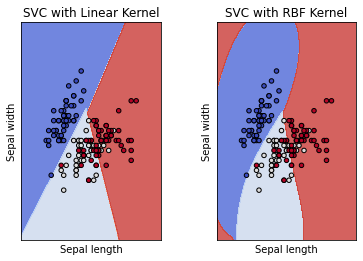

In [19]:
titles = ('SVC with Linear Kernel', 'SVC with RBF Kernel')

fig, sub = plt.subplots(1,2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
  plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
  ax.scatter(X0,X1,c=y, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
  ax.set_xlim(xx.min(), xx.max())
  ax.set_ylim(yy.min(), yy.max())
  ax.set_xlabel('Sepal length')
  ax.set_ylabel('Sepal width')
  ax.set_xticks(())
  ax.set_yticks(())
  ax.set_title(title)


plt.show()
                       